In [18]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

In [19]:
# function to concat the data
def concat_data(positive_file_name, negative_file_name):
    df_positive = pd.read_csv(positive_file_name)
    df_negative = pd.read_csv(negative_file_name)
    # Concatenate the data
    n_rows = df_positive.shape[0]
    df_negative_sampled = df_negative.sample(n=n_rows, random_state=42)
    df_combine = pd.concat([df_positive, df_negative_sampled])
    return df_combine

In [20]:
df_train = concat_data("2022_TP_total.csv", "2022_FP_total.csv")

In [21]:
df_test = concat_data("2021_TP_total.csv", "2021_FP_total.csv")

In [22]:
# function to preprocess the data
def preprocess_data(df):
    df["lightning"] = (df["lightning"] > 0).astype(int)
    df["v10"] = df["v10"].abs()
    df["u10"] = df["u10"].abs()
    df = df.drop(["time", "valid_time", "local_time", "season"], axis=1)

    # Drop columns which names contain '60'
    df = df.loc[:, ~df.columns.str.contains("60")]

    # Drop all columns which names contain 'after', except it contains 'shsr' AND 'after'
    cols_contains_after = df.filter(regex="after").columns
    cols_shsr_after = df.filter(regex="SHSR.*after").columns
    cols_to_drop = [col for col in cols_contains_after if col not in cols_shsr_after]
    df = df.drop(columns=cols_to_drop)

    # 填充 NaN 值，这里以均值为例
    df.fillna(df.mean(), inplace=True)
    return df

In [23]:
df_train=preprocess_data(df_train)
df_test=preprocess_data(df_test)

In [24]:
# only keep SHSR related columns
def keep_shsr_columns(df):
    for col in df.columns:
        if "SHSR" not in col and col != "lightning":
            df = df.drop(col, axis=1)
    return df

In [25]:
df_train = keep_shsr_columns(df_train)
df_test = keep_shsr_columns(df_test)

In [26]:
Y_train = df_train["lightning"]
Y_test = df_test["lightning"]

In [27]:
X_train = df_train.drop("lightning", axis=1)
X_test = df_test.drop("lightning", axis=1)

In [28]:
# Create a random forest classifier
rf = RandomForestClassifier(n_estimators=100, random_state=52)

In [29]:
# 检查 Y_train 是否包含 NaN 值
if Y_train.isnull().any():
    print("Y_train contains NaN values.")
else:
    print("Y_train does not contain any NaN values.")

Y_train does not contain any NaN values.


In [30]:
# fit the model
rf.fit(X_train, Y_train)

RandomForestClassifier(random_state=52)

In [31]:
# make predictions
y_pred_class = rf.predict(X_test)

In [34]:
# calculate the evaluation metrics
accuracy = accuracy_score(Y_test, y_pred_class)
precision = precision_score(Y_test, y_pred_class)
recall = recall_score(Y_test, y_pred_class)
f1 = f1_score(Y_test, y_pred_class)

# print the evaluation metrics
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

# plot the confusion matrix
cm = confusion_matrix(Y_test, y_pred_class)
print("Confusion Matrix:")
print(cm)

# 计算混淆矩阵
tn, fp, fn, tp = confusion_matrix(Y_test, y_pred_class).ravel()

# 计算FAR (False Acceptance Rate)
far = fp / (fp + tn)
print("False Acceptance Rate (FAR):", far)

# 计算POD (Probability of Detection)
pod = tp / (tp + fn)
print("Probability of Detection (POD):", pod)

Accuracy: 0.8618119343104226
Precision: 0.9111206610662067
Recall: 0.8247194883026133
F1 Score: 0.8657697722335654
Confusion Matrix:
[[433588  45293]
 [ 98681 464308]]
False Acceptance Rate (FAR): 0.09458090840939608
Probability of Detection (POD): 0.8247194883026133


Text(0.5, 1.0, 'Random Forest')

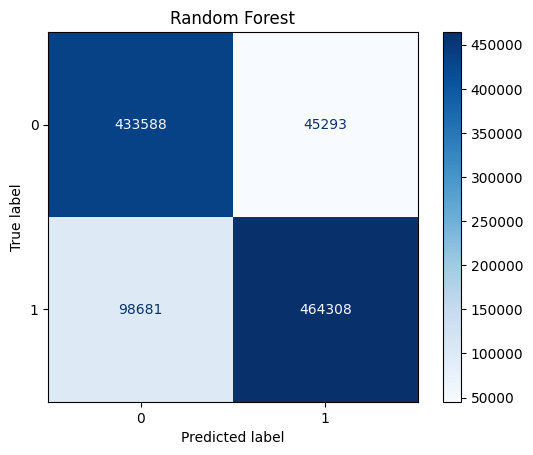

In [35]:
from sklearn.metrics import ConfusionMatrixDisplay

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap="Blues")
plt.title("Random Forest")

In [36]:
tn, fp, fn, tp = confusion_matrix(Y_test, y_pred_class).ravel()

# 计算FAR (False Acceptance Rate)
far = fp / (fp + tn)
print("False Acceptance Rate (FAR):", far)

# 计算POD (Probability of Detection)
pod = tp / (tp + fn)
print("Probability of Detection (POD):", pod)

False Acceptance Rate (FAR): 0.028046708010042467
Probability of Detection (POD): 0.18257666892436053
